# Extracting tiff from dcm

In [1]:
import os
import pydicom
import cv2
import numpy as np

# Paths
input_folder = "SCAN2_1-100"  # Folder containing DICOM files
output_folder = "SCAN2_1-100_TIFF"  # Folder to store extracted TIFF images

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List all DICOM (.dcm) files in the input folder
dcm_files = [f for f in os.listdir(input_folder) if f.endswith('.dcm')]
dcm_files.sort()  # Sort files to maintain order

# Process each DICOM file
for dcm_file in dcm_files:
    dcm_path = os.path.join(input_folder, dcm_file)

    # Read DICOM file
    dicom_data = pydicom.dcmread(dcm_path)

    # Convert DICOM pixel data to NumPy array
    image = dicom_data.pixel_array.astype(np.float32)

    # Normalize pixel values to 8-bit (0-255) for saving as TIFF
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Define output TIFF filename
    tiff_filename = os.path.splitext(dcm_file)[0] + ".tiff"
    tiff_path = os.path.join(output_folder, tiff_filename)

    # Save the extracted image as TIFF
    cv2.imwrite(tiff_path, image)

    print(f"Saved: {tiff_path}")

print("All DICOM images have been converted to TIFF and stored in", output_folder)


Saved: SCAN2_1-100_TIFF\112.1377.1797.1797.0.tiff
Saved: SCAN2_1-100_TIFF\112.1378.1798.1798.0.tiff
Saved: SCAN2_1-100_TIFF\112.1379.1799.1799.0.tiff
Saved: SCAN2_1-100_TIFF\112.1380.1800.1800.0.tiff
Saved: SCAN2_1-100_TIFF\112.1381.1801.1801.0.tiff
Saved: SCAN2_1-100_TIFF\112.1382.1802.1802.0.tiff
Saved: SCAN2_1-100_TIFF\112.1383.1803.1803.0.tiff
Saved: SCAN2_1-100_TIFF\112.1384.1804.1804.0.tiff
Saved: SCAN2_1-100_TIFF\112.1385.1805.1805.0.tiff
Saved: SCAN2_1-100_TIFF\112.1386.1806.1806.0.tiff
Saved: SCAN2_1-100_TIFF\112.1387.1807.1807.0.tiff
Saved: SCAN2_1-100_TIFF\112.1388.1808.1808.0.tiff
Saved: SCAN2_1-100_TIFF\112.1389.1809.1809.0.tiff
Saved: SCAN2_1-100_TIFF\112.1390.1810.1810.0.tiff
Saved: SCAN2_1-100_TIFF\112.1391.1811.1811.0.tiff
Saved: SCAN2_1-100_TIFF\112.1392.1812.1812.0.tiff
Saved: SCAN2_1-100_TIFF\112.1393.1813.1813.0.tiff
Saved: SCAN2_1-100_TIFF\112.1394.1814.1814.0.tiff
Saved: SCAN2_1-100_TIFF\112.1395.1815.1815.0.tiff
Saved: SCAN2_1-100_TIFF\112.1396.1816.1816.0.tiff


# MSE value

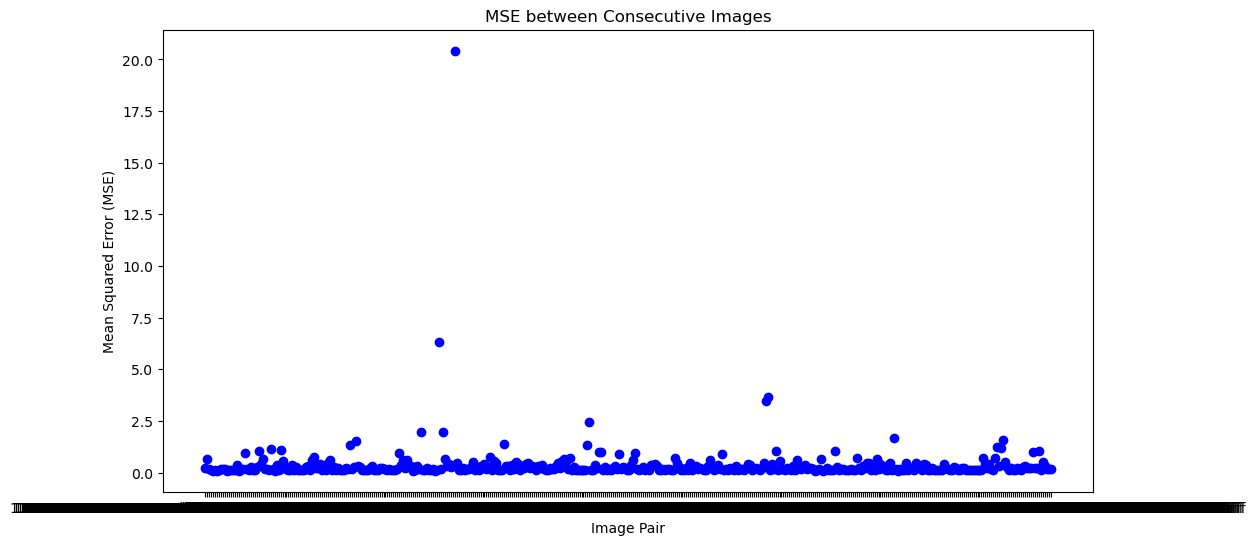

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to compute the Mean Squared Error (MSE) between two images
def compute_mse(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions for MSE calculation.")
    mse = np.mean((image1 - image2) ** 2)
    return mse

# Path to the folder containing TIFF images
folder_path = 'SCAN2(1-500)'

# List all TIFF files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.tiff')]
image_files.sort()  # Sort files to ensure consecutive order

# Read images and calculate MSE for each consecutive pair
previous_image = None
mse_values = []
image_pairs = []

for i, filename in enumerate(image_files):
    image_path = os.path.join(folder_path, filename)
    current_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if previous_image is not None:
        # Compute MSE between previous and current image
        mse = compute_mse(previous_image, current_image)
        mse_values.append(mse)
        image_pairs.append(f'{image_files[i-1]} vs {filename}')
    
    # Update previous_image
    previous_image = current_image

# Plot the MSE values
plt.figure(figsize=(12, 6))
plt.scatter(image_pairs, mse_values, color='b', marker='o')
plt.title('MSE between Consecutive Images')
plt.xlabel('Image Pair')
plt.ylabel('Mean Squared Error (MSE)')
#plt.xticks(rotation=90)  # Rotate x-axis labels for readability
#plt.grid(True)
#plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [6]:
# Print image pairs with MSE > 5
threshold = 5
for pair, mse in zip(image_pairs, mse_values):
    if mse > threshold:
        print(f"Image pair: {pair}, MSE: {mse}")

Image pair: 112.1496.1916.1916.0.tiff vs 112.1497.1917.1917.0.tiff, MSE: 6.324064254760742
Image pair: 112.1504.1924.1924.0.tiff vs 112.1505.1925.1925.0.tiff, MSE: 20.420615726047092


# Blurness

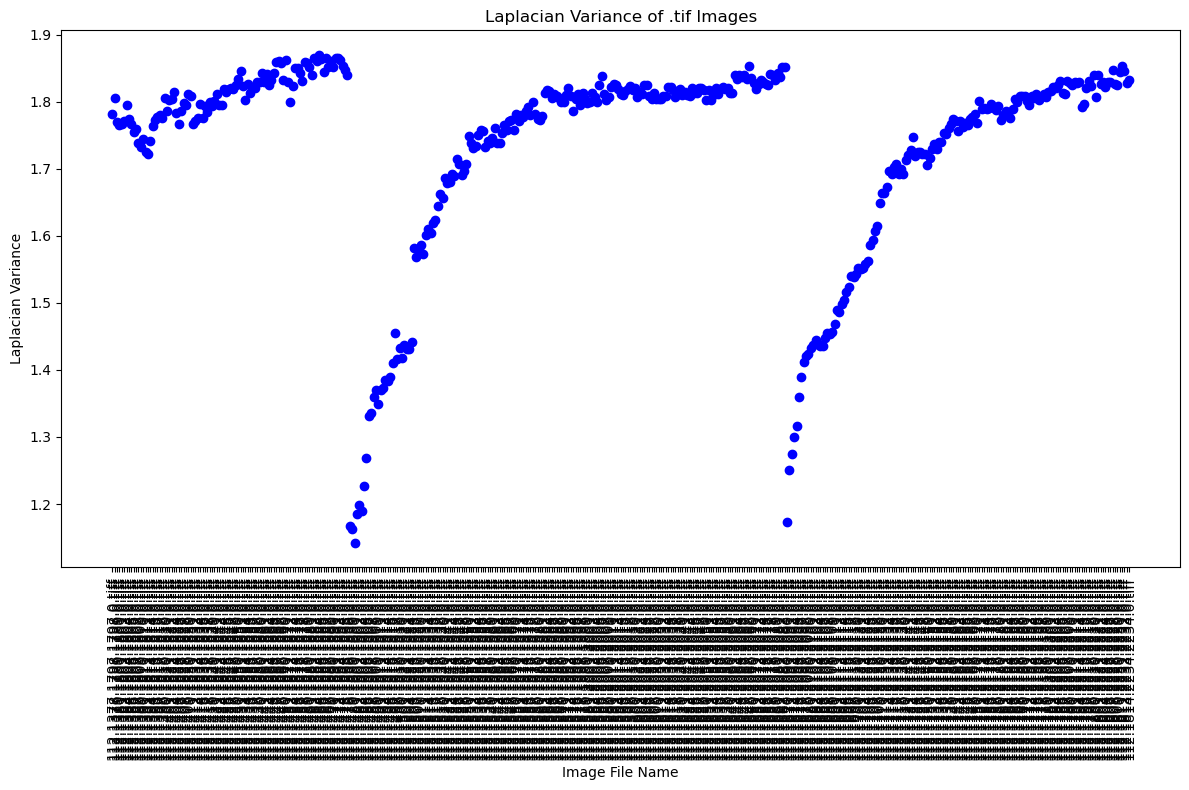

In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_laplacian_variance(image):
    """
    Calculate the variance of the Laplacian of the image.
    A lower variance indicates a blurrier image.
    """
    # Convert image to float32 for Laplacian transform
    #image = np.asarray(image, dtype=np.float32)
    
    # Apply Laplacian Transform
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    # Calculate the variance of the Laplacian
    variance = laplacian.var()
    return variance

def process_images(folder_path):
    """
    Process all .tif images in the given folder and extract Laplacian variance.
    """
    # List all .tif files in the directory
    files = [f for f in os.listdir(folder_path) if f.endswith('.tiff')]
    
    if not files:
        print("No .tif files found in the directory.")
        return
    
    # Dictionary to store results
    results = {}

    for file in files:
        file_path = os.path.join(folder_path, file)
        #print(f"Processing {file_path}...")
        
        # Read the .tif image using OpenCV
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read as-is

        if image is None:
            print(f"Error reading {file_path}. Skipping.")
            continue
        
        # Convert to grayscale if it's not already
        if len(image.shape) == 3:  # RGB or RGBA
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Ensure the image is in 2D (grayscale)
        if len(image.shape) != 2:
            print(f"{file} is not a valid grayscale image. Skipping.")
            continue
        
        # Convert 16-bit to 8-bit if necessary
        if image.dtype == np.uint16:
            image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))
        
        # Calculate the Laplacian variance
        variance = calculate_laplacian_variance(image)
        
        # Store the result
        results[file] = variance

    # Plot the results
    plt.figure(figsize=(12, 8))
    image_names = list(results.keys())
    variances = list(results.values())
    
    plt.scatter(image_names, variances, color='blue', marker='o')
    plt.xlabel('Image File Name')
    plt.ylabel('Laplacian Variance')
    plt.title('Laplacian Variance of .tif Images')
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    plt.tight_layout()  # Adjust layout to fit labels
    #plt.grid(True)  # Add grid for better readability
    plt.show()

# Replace 'your_folder_path' with the path to your folder containing .tif images
process_images('SCAN2(1-500)')


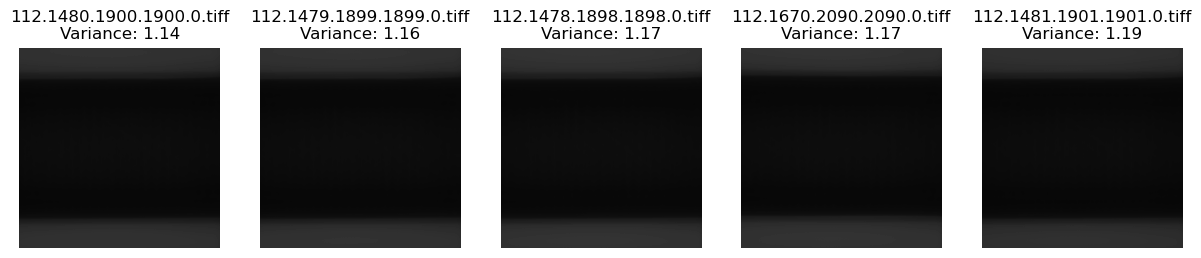

In [9]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_laplacian_variance(image):
    """
    Calculate the variance of the Laplacian of the image.
    A lower variance indicates a blurrier image.
    """
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def process_images(folder_path):
    """
    Process all .tif images in the given folder and extract Laplacian variance.
    """
    files = [f for f in os.listdir(folder_path) if f.endswith('.tiff')]
    
    if not files:
        print("No .tif files found in the directory.")
        return
    
    results = {}

    for file in files:
        file_path = os.path.join(folder_path, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error reading {file_path}. Skipping.")
            continue
        
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        if image.dtype == np.uint16:
            image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))
        
        variance = calculate_laplacian_variance(image)
        results[file] = (variance, image)  # Store variance and image

    # Sort images by Laplacian variance in ascending order
    sorted_results = sorted(results.items(), key=lambda x: x[1][0])[:5]
    
    # Display the 5 images with the lowest Laplacian variance
    plt.figure(figsize=(15, 5))
    for i, (file, (variance, image)) in enumerate(sorted_results):
        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{file}\nVariance: {variance:.2f}")
        plt.axis('off')
    
    plt.show()

# Replace 'your_folder_path' with the path to your folder containing .tif images
process_images('SCAN2(1-500)')
